# Looking at the sample metadata

In 24hr_env

Metadata from Tiptree tab of - [Google Doc](https://docs.google.com/spreadsheets/d/1Oh7zeWlQewzo9bDmnu5cenVM5a9zddVSlzS5OcUnhaE/edit?gid=1925226753#gid=1925226753)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Tiptree/Metadata/All metadata - Tiptree.tsv', sep='\t')   
air_data = data[data['Experiment'] == 'Air']
mildew_data = data[data['Experiment'] == 'Mildew']  

air_data['DNA yield (extraction)'] = air_data['DNA yield (extraction)'].str.replace('too low', '0')
air_data['DNA yield (extraction)'] = air_data['DNA yield (extraction)'].astype(float)

air_data['DNA yield (Mia_WGA)'] = air_data['DNA yield (Mia_WGA)'].str.replace('too low', '0')
air_data['DNA yield (Mia_WGA)'] = air_data['DNA yield (Mia_WGA)'].astype(float)

air_data['DNA yield (Darren_WGA)'] = air_data['DNA yield (Darren_WGA)'].str.replace('too low', '0')
air_data['DNA yield (Darren_WGA)'] = pd.to_numeric(air_data['DNA yield (Darren_WGA)'], errors='coerce')

/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_82482/3386185781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_data['DNA yield (extraction)'] = air_data['DNA yield (extraction)'].str.replace('too low', '0')
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_82482/3386185781.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_data['DNA yield (extraction)'] = air_data['DNA yield (extraction)'].astype(float)
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_82482/33861

In [4]:
air_data['Collection Date'] = pd.to_datetime(air_data['Collection Date'], format='%d/%m/%Y')
air_data['Month'] = air_data['Collection Date'].dt.strftime('%b')

/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_82482/1692625840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_data['Collection Date'] = pd.to_datetime(air_data['Collection Date'], format='%d/%m/%Y')
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_82482/1692625840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_data['Month'] = air_data['Collection Date'].dt.strftime('%b')


## Generate some stats

Want the average & range of Initial DNA yield, WGA DNA yield, pass reads

In [5]:
air_data.describe().round(3)

,Sample,20 ng,H2O,Barcode,Collection Date,DNA yield (extraction),DNA yield (Mia_WGA),DNA yield (Darren_WGA),DNA yield of used sample (WGA),pass reads,fail reads,total reads,N50 Length,Pass reads >300 bp (%),Pass reads removed due to filters (%),Pool
count,48.000,0.0,0.0,48.000,48,48.000,48.000,20.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000
mean,4.476,NaN,NaN,12.500,2022-05-13 12:00:00,1.387,40.971,29.230,53.069,45169.333,5316.417,50485.750,2790.646,92.609,1.449,1.500
min,1.100,NaN,NaN,1.000,2022-02-10 00:00:00,0.000,0.000,0.000,0.000,125.000,395.000,520.000,464.000,1.170,0.000,1.000
25%,2.975,NaN,NaN,6.750,2022-03-29 06:00:00,0.322,0.000,0.000,2.355,25651.250,2948.500,30364.750,1610.250,93.002,0.758,1.000
50%,4.850,NaN,NaN,12.500,2022-05-24 12:00:00,0.599,6.130,1.095,28.200,46029.000,5415.500,51323.500,2621.000,96.790,1.010,1.500
75%,5.950,NaN,NaN,18.250,2022-06-16 00:00:00,1.792,76.750,41.175,95.875,62653.000,6657.000,69914.750,3924.750,97.215,1.532,2.000
max,7.600,NaN,NaN,24.000,2022-08-11 00:00:00,13.800,259.000,136.000,259.000,160896.000,16300.000,175091.000,6536.000,97.900,8.350,2.000
std,1.930,NaN,NaN,6.995,NaN,2.272,60.455,43.928,60.303,33146.415,3409.848,36130.331,1587.923,14.525,1.382,0.505


In [6]:
# Average & range of DNA yields without insects
air_data_no_insects = air_data[air_data['Insect'] != 'yes']
air_data_no_insects.describe().round(3)

,Sample,20 ng,H2O,Barcode,Collection Date,DNA yield (extraction),DNA yield (Mia_WGA),DNA yield (Darren_WGA),DNA yield of used sample (WGA),pass reads,fail reads,total reads,N50 Length,Pass reads >300 bp (%),Pass reads removed due to filters (%),Pool
count,44.000,0.0,0.0,44.000,44,44.000,44.000,20.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000
mean,4.361,NaN,NaN,12.705,2022-05-09 15:16:21.818181888,0.837,28.696,29.229,41.893,41286.523,5121.273,46407.795,2747.136,92.186,1.499,1.455
min,1.100,NaN,NaN,1.000,2022-02-10 00:00:00,0.000,0.000,0.000,0.000,125.000,395.000,520.000,464.000,1.170,0.000,1.000
25%,2.575,NaN,NaN,7.000,2022-03-09 00:00:00,0.321,0.000,0.000,1.820,19576.000,2310.250,24699.500,1523.500,92.902,0.758,1.000
50%,4.450,NaN,NaN,12.500,2022-05-11 00:00:00,0.493,3.190,1.095,25.250,45473.000,5345.500,50168.000,2306.000,96.620,1.040,1.000
75%,5.750,NaN,NaN,19.000,2022-06-07 00:00:00,1.086,36.200,41.175,76.175,58224.750,6512.000,63590.250,3924.750,97.188,1.568,2.000
max,7.600,NaN,NaN,24.000,2022-08-11 00:00:00,2.970,144.000,136.000,144.000,130799.000,16300.000,144505.000,6536.000,97.900,8.350,2.000
std,1.970,NaN,NaN,7.129,NaN,0.758,43.151,43.928,46.461,28681.246,3273.409,31529.889,1641.286,15.113,1.432,0.504


In [7]:
# Number of samples with undetectable DNA before WGA
before_WGA = air_data[air_data['DNA yield (extraction)'] == 0]
# Number of samples with undetectable DNA after Mia WGA
after_WGA = air_data[air_data['DNA yield of used sample (WGA)'] == 0]

print('Number of samples with undetectable DNA before WGA:', len(before_WGA))
print('Number of samples with undetectable DNA after WGA:', len(after_WGA))

Number of samples with undetectable DNA before WGA: 4
Number of samples with undetectable DNA after WGA: 8


## Plots 

- Boxplot of Samples DNA Yield before & after WGA
- Grouped by month / collection location

In [12]:
melted_data = pd.melt(air_data, 
                      id_vars=['Month'], 
                      # id_vars=['Location'],
                      value_vars=['DNA yield (extraction)', 'DNA yield of used sample (WGA)'], 
                      var_name='Yield',
                      value_name='DNA_Yield')

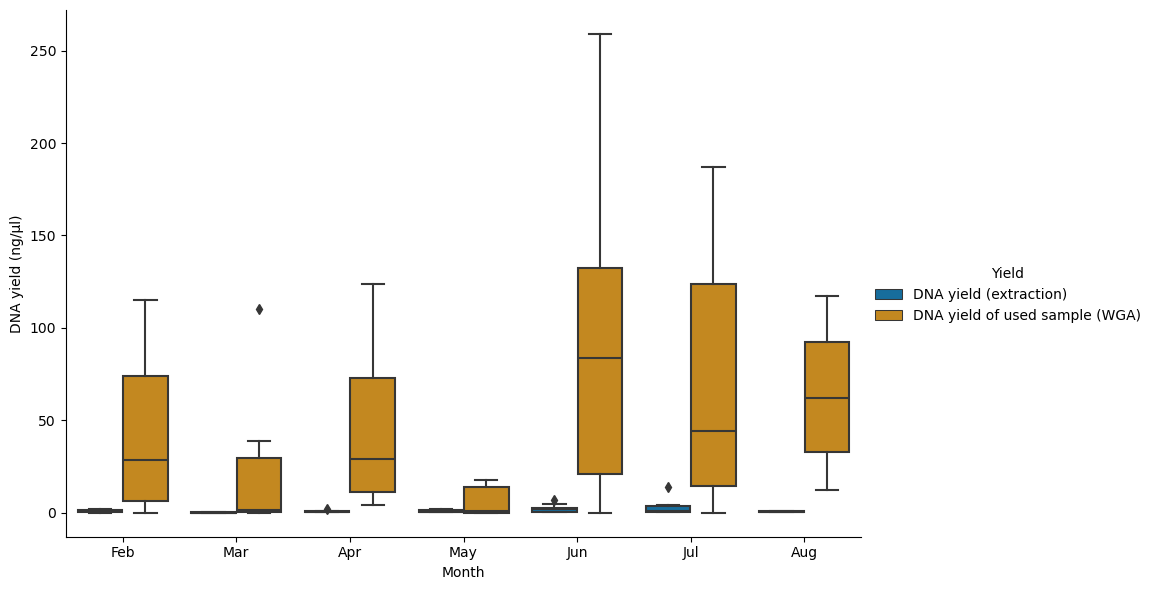

In [13]:
#Boxplot of DNA yields
plot = sns.catplot(data=melted_data,
                   x='Month',
                  #  x='Location',
                   y='DNA_Yield', 
                   kind='box', 
                   hue='Yield',
                   height=6, aspect=1.5,
                   palette='colorblind')

plot.set_axis_labels('Month', 'DNA yield (ng/μl)')
plt.savefig('/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Tiptree/Graphs/DNA_yield_boxplot_month.png')

Plot of WGA DNA yield & Number of pass reads / total reads

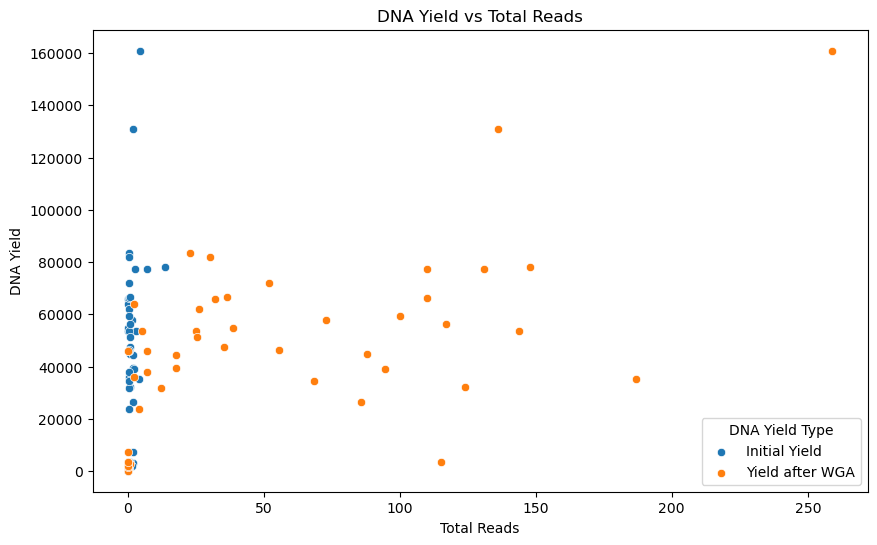

In [22]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(y='pass reads', x='DNA yield (extraction)', data=air_data, label='Initial Yield')
sns.scatterplot(y='pass reads', x='DNA yield of used sample (WGA)', data=air_data, label='Yield after WGA')
plt.title('DNA Yield vs Total Reads')
plt.xlabel('Total Reads')
plt.ylabel('DNA Yield')
plt.legend(title='DNA Yield Type')
plt.show()

In [17]:
air_data.columns

Index(['Sample', 'Experiment', 'BR Qubit', '20 ng', 'H2O', 'Barcode',
       'Raw reads', 'Collection Date', 'Air sampler', 'Location', 'Insect',
       'DNA yield (extraction)', 'DNA yield (Mia_WGA)',
       'DNA yield (Darren_WGA)', 'DNA yield of used sample (WGA)',
       'pass reads', 'fail reads', 'total reads', 'N50 Length',
       'Pass reads >300 bp (%)', 'Pass reads removed due to filters (%)',
       'Pool', 'Month'],
      dtype='object')